In [2]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz


Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


# 建立共用函數

In [3]:
def weight(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1), name='W')

def bias(shape):
    return tf.Variable(tf.constant(0.1, shape=shape), name='b')

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# 輸入層 Input Layer

In [4]:
with tf.name_scope('Input_Layer'):
    x = tf.placeholder("float", shape=[None, 784], name="x")
    x_image = tf.reshape(x, [-1, 28, 28, 1])

# Convolutional Layer 1

In [5]:
with tf.name_scope('C1_Conv'):
    W1 = weight([5, 5, 1, 32])
    b1 = bias([32])
    Conv1 = conv2d(x_image, W1) + b1
    C1_Conv = tf.nn.relu(Conv1)

In [6]:
with tf.name_scope('C1_Pool'):
    C1_Pool = max_pool_2x2(C1_Conv)

# Convolutional Layer 2

In [7]:
with tf.name_scope('C2_Conv'):
    W2 = weight([5, 5, 32, 64])
    b2 = bias([64])
    Conv2 = conv2d(C1_Pool, W2) + b2
    C2_Conv = tf.nn.relu(Conv2)

In [8]:
with tf.name_scope('C2_Pool'):
    C2_Pool = max_pool_2x2(C2_Conv)

# Fully Connected Layer

In [9]:
with tf.name_scope('D_Flat'):
    D_Flat = tf.reshape(C2_Pool, [-1, 7 * 7 * 64])

In [10]:
with tf.name_scope('D_Hidden_Layer'):
    W3 = weight([7 * 7 * 64, 1024])
    b3 = bias([1024])
    D_Hidden = tf.nn.relu(tf.matmul(D_Flat, W3) + b3)
    keep_prob = tf.placeholder(tf.float32)
    D_Hidden_Dropout = tf.nn.dropout(D_Hidden, keep_prob=keep_prob)

# 輸出層Output

In [11]:
with tf.name_scope('Output_Layer'):
    W4 = weight([1024, 10])
    b4 = bias([10])
    y_predict = tf.nn.softmax(tf.matmul(D_Hidden_Dropout, W4) + b4)

# 設定訓練模型最佳化步驟

In [12]:
with tf.name_scope("optimizer"):
    y_label = tf.placeholder("float", shape=[None, 10], name="y_label")
    loss_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_predict, labels=y_label))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.0001).minimize(loss_function)

# 設定評估模型

In [13]:
with tf.name_scope("evaluate_model"):
    correct_prediction = tf.equal(tf.argmax(y_predict, 1), tf.argmax(y_label, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# 訓練模型

In [14]:
trainEpochs = 20
batchSize = 100
totalBatchs = int(mnist.train.num_examples / batchSize)
epoch_list = []
accuracy_list = []
loss_list = []

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
startTime = time()
for epoch in range(trainEpochs):

    for i in range(totalBatchs):
        batch_x, batch_y = mnist.train.next_batch(batchSize)
        sess.run(optimizer, feed_dict={x: batch_x, y_label: batch_y, keep_prob: 0.8})

    loss, acc = sess.run([loss_function, accuracy],
                         feed_dict={x: mnist.validation.images, y_label: mnist.validation.labels, keep_prob: 1.0})

    epoch_list.append(epoch)
    loss_list.append(loss)
    accuracy_list.append(acc)

    print("Train Epoch:", '%02d' % (epoch + 1), "Loss=", "{:.9f}".format(loss), " Accuracy=", acc)

duration = time() - startTime
print("Train Finished takes:", duration)

Train Epoch: 01 Loss= 1.601079345  Accuracy= 0.8608


Train Epoch: 02 Loss= 1.584741235  Accuracy= 0.878


Train Epoch: 03 Loss= 1.486779928  Accuracy= 0.9758


Train Epoch: 04 Loss= 1.483151317  Accuracy= 0.979


Train Epoch: 05 Loss= 1.479527235  Accuracy= 0.9826


Train Epoch: 06 Loss= 1.478400946  Accuracy= 0.9836


Train Epoch: 07 Loss= 1.476243496  Accuracy= 0.9858


Train Epoch: 08 Loss= 1.475942731  Accuracy= 0.9862


Train Epoch: 09 Loss= 1.473745584  Accuracy= 0.9886


Train Epoch: 10 Loss= 1.474477053  Accuracy= 0.9872


Train Epoch: 11 Loss= 1.473155737  Accuracy= 0.9878


Train Epoch: 12 Loss= 1.473196149  Accuracy= 0.989


Train Epoch: 13 Loss= 1.472961903  Accuracy= 0.988


Train Epoch: 14 Loss= 1.473559499  Accuracy= 0.9886


Train Epoch: 15 Loss= 1.471239209  Accuracy= 0.9908


Train Epoch: 16 Loss= 1.470869780  Accuracy= 0.991


Train Epoch: 17 Loss= 1.470884562  Accuracy= 0.9918


Train Epoch: 18 Loss= 1.471243978  Accuracy= 0.9906


Train Epoch: 19 Loss= 1.470910311  Accuracy= 0.991


Train Epoch: 20 Loss= 1.470942020  Accuracy= 0.9914
Train Finished takes: 687.8762888908386


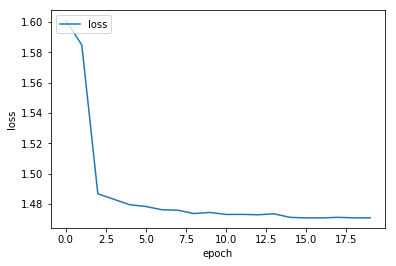

In [16]:
plt.plot(epoch_list, loss_list, label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

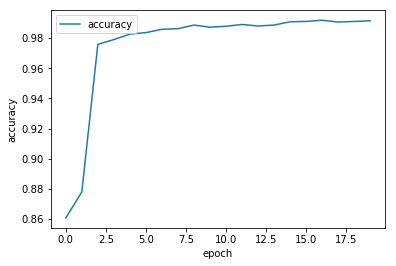

In [17]:
plt.plot(epoch_list, accuracy_list, label="accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'])

In [18]:
print("Accuracy:", sess.run(accuracy, feed_dict={x: mnist.test.images[:3000],
                                                 y_label: mnist.test.labels[:3000],
                                                 keep_prob: 1.0}))

Accuracy: 0.985667


In [19]:
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25:
        num = 25
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1 + i)

        ax.imshow(np.reshape(images[idx], (28, 28)),
                  cmap='binary')

        title = "label=" + str(labels[idx])
        if len(prediction) > 0:
            title += ",predict=" + str(prediction[idx])

        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        idx += 1
    plt.show()

真實值為:  4 預測值為:  9
真實值為:  4 預測值為:  6
真實值為:  2 預測值為:  7
真實值為:  5 預測值為:  3
真實值為:  8 預測值為:  9
真實值為:  3 預測值為:  5
真實值為:  8 預測值為:  2
真實值為:  2 預測值為:  7
真實值為:  7 預測值為:  3
真實值為:  0 預測值為:  5


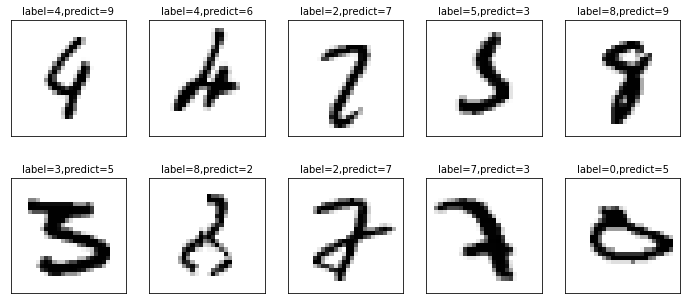


predict    0    1    2    3    4    5    6    7    8    9
label                                                    
0        269    0    0    0    0    1    1    0    0    0
1          0  339    0    0    0    1    0    0    0    0
2          1    0  308    0    1    0    0    3    0    0
3          0    0    0  315    0    1    0    0    0    0
4          0    0    0    0  313    0    2    0    0    3
5          0    0    0    4    0  279    0    0    0    0
6          1    1    0    0    0    2  268    0    0    0
7          0    1    3    1    0    0    0  297    0    4
8          1    0    1    2    1    0    0    1  278    2
9          1    0    0    0    1    2    0    0    0  291


In [20]:
prediction = sess.run(tf.argmax(y_predict, axis=1), feed_dict={x: mnist.test.images[:3000], keep_prob: 1.0})
label = sess.run(tf.argmax(y_label, axis=1), feed_dict={y_label: mnist.test.labels[:3000]})

df = pd.DataFrame({'label': label, 'predict': prediction})
index = df[df.label != df.predict].index

for i in index[:10]:
    print('真實值為: ', label[i], '預測值為: ', prediction[i])


plot_images_labels_prediction(mnist.test.images[index], label[index], prediction[index], idx=0)
print()
matrix = pd.crosstab(df.label, df.predict)
print(matrix)